# Análise dataset Pokémon Go

In [5]:
#install.packages('ggplot2')
library(ggplot2) # Data visualization

In [6]:
#Lendo o dataset
data = read.csv('300k.csv')

In [41]:
# Medidas resumo
#Média, freq e quantis
summary(data)

   pokemonId         latitude        longitude      
 Min.   :  1.00   Min.   :-42.98   Min.   :-159.33  
 1st Qu.: 16.00   1st Qu.: 33.81   1st Qu.: -90.24  
 Median : 21.00   Median : 42.25   Median : -71.12  
 Mean   : 45.32   Mean   : 38.77   Mean   : -35.70  
 3rd Qu.: 69.00   3rd Qu.: 49.48   3rd Qu.:  12.57  
 Max.   :149.00   Max.   : 68.44   Max.   : 175.62  
                                                    
           appearedLocalTime                            X_id       
 2016-09-06T14:56:22:   146   MjA0MDA1MzgyMjQ5NDg0NDkz    :     1  
 2016-09-04T11:54:36:     8   MjA0MDA2NDkzNjUwMjUzMzgyMQ==:     1  
 2016-09-03T00:28:22:     7   MjA0MDA2Njg2MTA5MTYxMDQ5Mw==:     1  
 2016-09-03T00:28:36:     7   MjA0MDAwNzgyOTgxMjA0MjU3Mw==:     1  
 2016-09-03T09:11:41:     7   MjA0MDAxMTg4NDM1MjUzNzk4MQ==:     1  
 2016-09-03T09:57:25:     7   MjA0MDAxNDcwMjk2OTc3ODgyOQ==:     1  
 (Other)            :295839   (Other)                     :296015  
   cellId_90m         cellId_180

In [40]:
numeric_fields = data[, c(
                        'latitude', 
                       'longitude', 
                       'temperature', 
                       'windSpeed', 
                       'windBearing', 
                       'pressure', 
                       'population_density', 
                       'gymDistanceKm'
                     )]
# Desvio padrão
apply(numeric_fields, 2, sd)

latitude          longitude        temperature          windSpeed 
         17.029203          67.398336           6.193089           4.175102 
       windBearing           pressure population_density      gymDistanceKm 
         99.942247           5.633861        1913.710175          18.646146

In [58]:
# Correlações
correlations = cor(numeric_fields)
subset(as.data.frame(as.table(correlations)), Var1 != Var2 & abs(Freq) > 0.2) # Nenhuma correlação notável

,Var1,Var2,Freq
3,temperature,latitude,-0.2202821
17,latitude,temperature,-0.2202821
38,pressure,windBearing,-0.2425995
45,windBearing,pressure,-0.2425995


In [17]:
topCities

Var1,Freq
New_York,54177
Chicago,32046
Prague,28000
Los_Angeles,22108
London,19094
Rome,15883
Mexico_City,12672
Paris,11210
Stockholm,9786
Zurich,6563


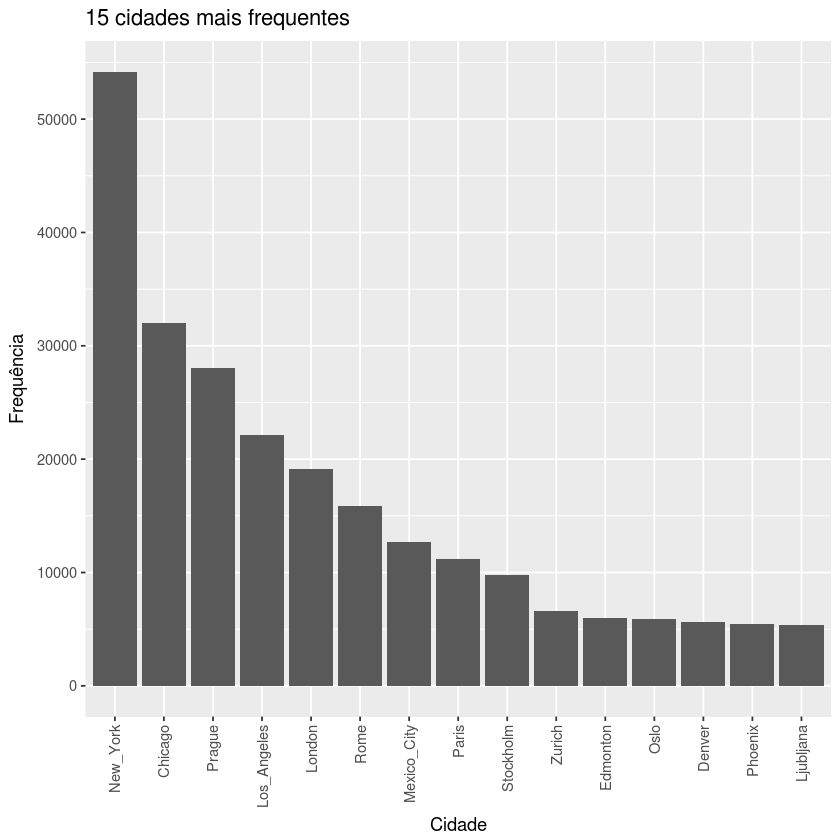

In [77]:
## Cidades mais frequentes
citiesFreq = table(data$city);
topCities = as.data.frame(sort(citiesFreq, decreasing=TRUE)[1:15]);

ggplot(data=topCities, aes(x=Var1,y=Freq)) +
      coord_cartesian() +      
      geom_bar(position="dodge", stat="identity") + 
      scale_y_continuous(breaks = seq(0, 60000, by = 10000)) + 
      ggtitle("15 cidades mais frequentes") + 
      
      xlab("Cidade") +
      ylab("Frequência") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

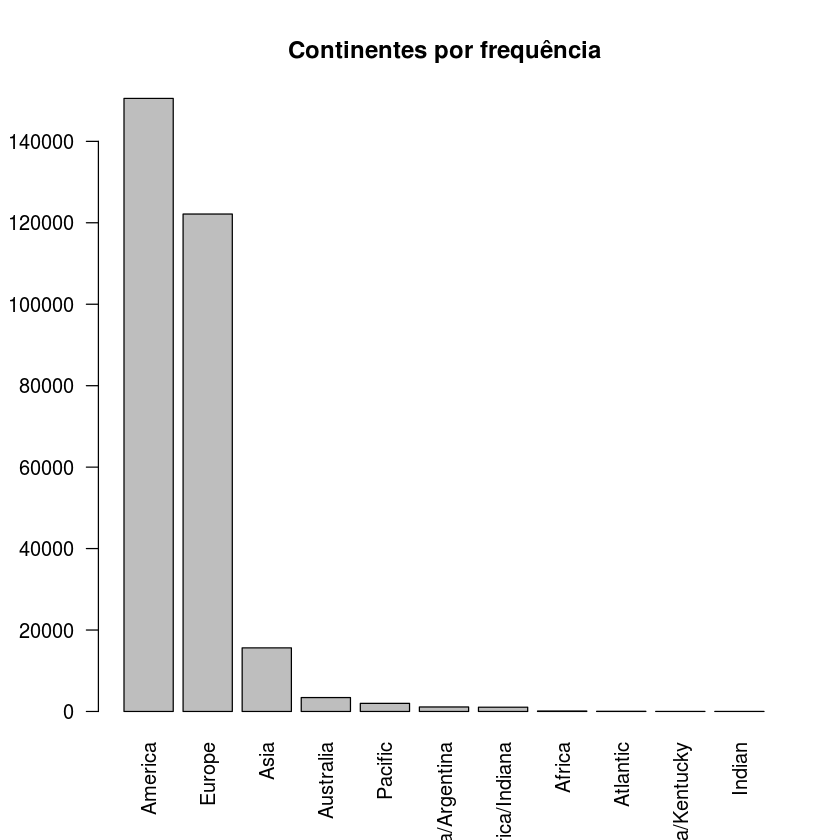

In [92]:
# Continentes
continentFreq = table(data$continent);
continents = sort(continentFreq, decreasing=TRUE);
barplot(continents, 
        las=2,
        main="Continentes por frequência"
    );

In [10]:
show(data[, c('class')])

   [1]  16 133  16  13 133  21  66  27  35  19 116  74  16  19  19  19  16  13
  [19]  32 129  23  75  35  29  16  58  48  46  41  19  21  60 120 120 147  41
  [37]  13  16  98  41  16  19  17  46 114 116  13  21  19  16  32  15  16  41
  [55]  21  74  13  63  13  16  23  46  21  48  13  46 104  13 102  16 133  16
  [73]  52  16 133  21  13  29  56 133 111  16  13  48  10  16  14  25 133 133
  [91]  50  13  16  58  21  79  21  74  16  25  46  19  16  16  23  41  96  46
 [109]  13 116  41  16  19  13  16 123  21  29  16  16  16 133  69  16  16  19
 [127]  21  35  16  19  16  16  56  16  13  16  27 128  16  41  16  13  60  48
 [145]  41  16  63  21 133 127  16  11  13 129  13  21  74  19  48  16  10 111
 [163]  13  58  23  54  23  46  46  16  19  19  23  19  77  13  48  54  19  13
 [181]  48  49  35  74  35  16  41 133  35  16  35  10  35  41  42   1  48  60
 [199]  56 129  19  48  16  13  21  52  72  41  23  35  37  10  74 133  41  46
 [217] 120 116  58  19  43  48  19  95  58 128  66  

In [4]:
summary(data)

   pokemonId         latitude        longitude      
 Min.   :  1.00   Min.   :-37.56   Min.   :-123.16  
 1st Qu.: 16.00   1st Qu.: 29.97   1st Qu.: -97.46  
 Median : 21.00   Median : 38.42   Median : -88.10  
 Mean   : 44.49   Mean   : 34.59   Mean   : -77.40  
 3rd Qu.: 60.00   3rd Qu.: 42.25   3rd Qu.: -77.34  
 Max.   :148.00   Max.   : 53.65   Max.   : 166.45  
                                                    
           appearedLocalTime                           X_id     
 2016-09-08T01:21:55:   6    MjA0MDEyMjQ1Mzc2ODU4MjI4NQ==:   1  
 2016-09-08T02:22:38:   6    MjA0NTcwNDYwNjc3NDUyOTc4OQ==:   1  
 2016-09-08T01:03:16:   5    MjA0NTI5ODQ2ODM1NTI2NjA1    :   1  
 2016-09-08T01:29:30:   5    MjA0Nzk4MTE0NTYzODIxMjk4OQ==:   1  
 2016-09-08T01:38:33:   5    MjA1MDMxMjMxNTkxMjkxMTM0MQ==:   1  
 2016-09-08T00:41:08:   4    MjA1MTI0MzY2OTg1ODE1MzQwNQ==:   1  
 (Other)            :4969    (Other)                     :4994  
   cellId_90m         cellId_180m         cellId_370m   

In [25]:
levels(data$continent)

[1] "America"           "America/Argentina" "America/Indiana"  
[4] "Asia"              "Australia"         "Europe"           
[7] "Pacific"

In [47]:
subset(data, city == 'Prague')$continent

[1] Europe Europe Europe Europe Europe Europe Europe Europe Europe Europe
[11] Europe Europe Europe Europe Europe Europe Europe Europe Europe Europe
[21] Europe Europe Europe Europe Europe Europe Europe Europe Europe Europe
[31] Europe Europe Europe Europe Europe Europe Europe Europe Europe Europe
[41] Europe Europe Europe Europe Europe Europe Europe Europe Europe Europe
[51] Europe Europe Europe Europe Europe Europe Europe Europe Europe
7 Levels: America America/Argentina America/Indiana Asia Australia ... Pacific

In [51]:
# subset(data, continent == 'America/Indiana')$city
data[data$continent == 'America','city']
# data[data$continent == 'America/Argentina',]$continent2 = 'America'
# data[data$continent == 'Australia',]$continent2 = 'Pacific'
# data[, c('city', 'continent2')]

[1] Mexico_City Mexico_City New_York    Los_Angeles Los_Angeles Chicago    
   [7] Mexico_City New_York    New_York    New_York    Chicago     Mexico_City
  [13] Chicago     Los_Angeles Mexico_City Edmonton    Mexico_City New_York   
  [19] Chicago     Mexico_City Los_Angeles Mexico_City Chicago     Los_Angeles
  [25] Los_Angeles Mexico_City New_York    Los_Angeles Los_Angeles New_York   
  [31] Los_Angeles Los_Angeles Los_Angeles Los_Angeles Mexico_City New_York   
  [37] Los_Angeles Los_Angeles Los_Angeles Mexico_City Los_Angeles Mexico_City
  [43] Phoenix     Chicago     New_York    Phoenix     Phoenix     Los_Angeles
  [49] New_York    New_York    New_York    Vancouver   Los_Angeles Los_Angeles
  [55] New_York    Los_Angeles Chicago     Los_Angeles New_York    Los_Angeles
  [61] New_York    New_York    Mexico_City Phoenix     Mexico_City Chicago    
  [67] Edmonton    New_York    New_York    Denver      Los_Angeles Edmonton   
  [73] Vancouver   Vancouver   Los_Angeles Los_Angeles Los_Angeles New_York   
  [79] Los_Angeles New_York    Edmonton    Los_Angeles Los_Angeles New_York   
  [85] Chicago     Los_Angeles Phoenix     Los_Angeles Edmonton    Mexico_City
  [91] Vancouver   New_York    New_York    Edmonton    Los_Angeles New_York   
  [97] New_York    Los_Angeles Vancouver   Los_Angeles New_York    New_York   
 [103] Mexico_City Edmonton    Chicago     Los_Angeles Chicago     Mexico_City
 [109] Mexico_City New_York    New_York    New_York    Los_Angeles Chicago    
 [115] New_York    Chicago     New_York    New_York    Vancouver   Chicago    
 [121] New_York    Mexico_City New_York    New_York    Chicago     Vancouver  
 [127] Edmonton    New_York    Los_Angeles Edmonton    Chicago     Edmonton   
 [133] Mexico_City Edmonton    Vancouver   Chicago     Edmonton    New_York   
 [139] Los_Angeles Edmonton    Los_Angeles New_York    Los_Angeles Los_Angeles
 [145] New_York    Los_Angeles Denver      Chicago     New_York    Los_Angeles
 [151] Mexico_City Denver      Phoenix     Los_Angeles New_York    Edmonton   
 [157] Chicago     New_York    New_York    Los_Angeles New_York    New_York   
 [163] Chicago     Vancouver   Edmonton    New_York    Los_Angeles Mexico_City
 [169] New_York    New_York    Los_Angeles Denver      New_York    Chicago    
 [175] New_York    Denver      New_York    New_York    Denver      Mexico_City
 [181] Chicago     Los_Angeles Toronto     Monterrey   Vancouver   Edmonton   
 [187] Mexico_City New_York    New_York    Chicago     New_York    New_York   
 [193] Los_Angeles Monterrey   Chicago     New_York    Monterrey   Los_Angeles
 [199] Chicago     Los_Angeles Los_Angeles Los_Angeles Mexico_City Mexico_City
 [205] New_York    Los_Angeles Los_Angeles Monterrey   Los_Angeles Los_Angeles
 [211] Los_Angeles Los_Angeles Vancouver   Chicago     Mexico_City Chicago    
 [217] Mexico_City Chicago     Chicago     Chicago     Los_Angeles Los_Angeles
 [223] Chicago     New_York    Los_Angeles New_York    Los_Angeles Edmonton   
 [229] Mexico_City Edmonton    Mexico_City Chicago     New_York    Chicago    
 [235] Mexico_City Chicago     New_York    Mexico_City Chicago     New_York   
 [241] New_York    Monterrey   Los_Angeles Mexico_City Mexico_City Chicago    
 [247] Los_Angeles Mexico_City Toronto     Chicago     Chicago     Chicago    
 [253] New_York    Edmonton    Chicago     Toronto     Mexico_City New_York   
 [259] New_York    Mexico_City Chicago     Los_Angeles New_York    Monterrey  
 [265] Chicago     New_York    Monterrey   New_York    Los_Angeles New_York   
 [271] New_York    New_York    Los_Angeles Monterrey   Monterrey   New_York   
 [277] Mexico_City Los_Angeles New_York    Mexico_City New_York    Edmonton   
 [283] Edmonton    Los_Angeles Los_Angeles Chicago     Chicago     New_York   
 [289] New_York    Edmonton    Monterrey   New_York    Edmonton    Chicago    
 [295] Edmonton    Edmonton    New_York    Mexico_City New_York    New_York   
 [301] Monterrey   Los_Angeles Chicago     New_York  

In [11]:
map

ERROR: Error in eval(expr, envir, enclos): object 'map' not found


- TODO Blend continents in dataset

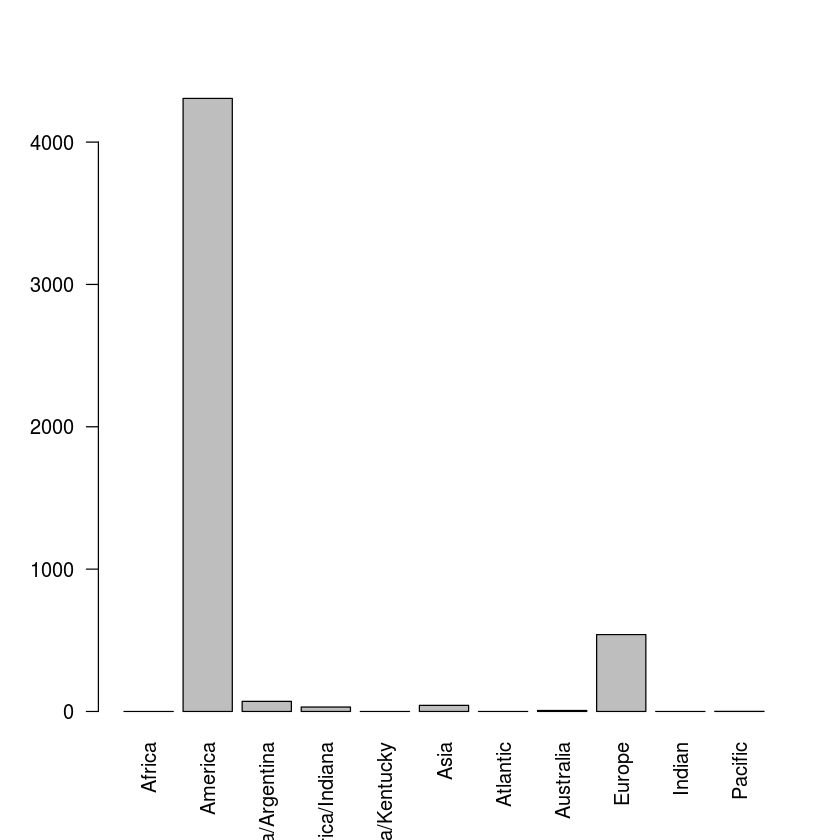

In [9]:
plot(sort(data$continent), las=2)

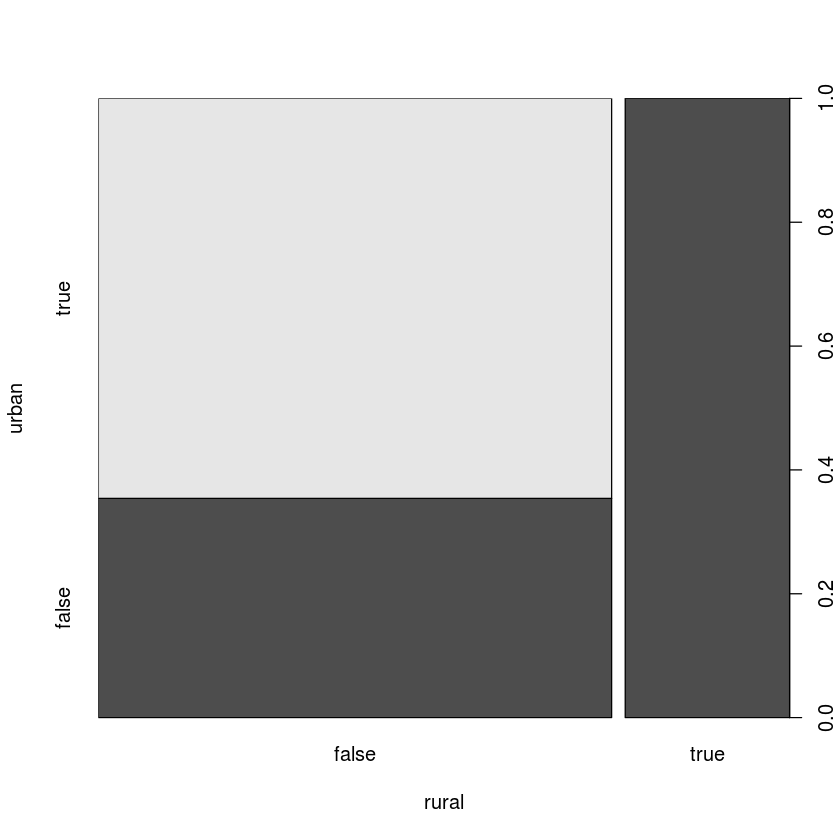

In [28]:
# 'pokemonId' 'latitude' 'longitude' 'appearedLocalTime' 'X_id' 'cellId_90m' 'cellId_180m' 'cellId_370m' 'cellId_730m' 'cellId_1460m' 'cellId_2920m' 'cellId_5850m' 'appearedTimeOfDay' 'appearedHour' 'appearedMinute' 'appearedDayOfWeek' 'appearedDay' 'appearedMonth' 'appearedYear' 'terrainType' 'closeToWater' 'city' 'continent' 'weather' 'temperature' 'windSpeed' 'windBearing' 'pressure' 'weatherIcon' 'sunriseMinutesMidnight' 'sunriseHour' 'sunriseMinute' 'sunriseMinutesSince' 'sunsetMinutesMidnight' 'sunsetHour' 'sunsetMinute' 'sunsetMinutesBefore' 'population_density' 'urban' 'suburban' 'midurban' 'rural' 'gymDistanceKm' 'gymIn100m' 'gymIn250m' 'gymIn500m' 'gymIn1000m' 'gymIn2500m' 'gymIn5000m' 'pokestopDistanceKm' 'pokestopIn100m' 'pokestopIn250m' 'pokestopIn500m' 'pokestopIn1000m' 'pokestopIn2500m' 'pokestopIn5000m' 'cooc_1' 'cooc_2' 'cooc_3' 'cooc_4' 'cooc_5' 'cooc_6' 'cooc_7' 'cooc_8' 'cooc_9' 'cooc_10' 'cooc_11' 'cooc_12' 'cooc_13' 'cooc_14' 'cooc_15' 'cooc_16' 'cooc_17' 'cooc_18' 'cooc_19' 'cooc_20' 'cooc_21' 'cooc_22' 'cooc_23' 'cooc_24' 'cooc_25' 'cooc_26' 'cooc_27' 'cooc_28' 'cooc_29' 'cooc_30' 'cooc_31' 'cooc_32' 'cooc_33' 'cooc_34' 'cooc_35' 'cooc_36' 'cooc_37' 'cooc_38' 'cooc_39' 'cooc_40' 'cooc_41' 'cooc_42' 'cooc_43' 'cooc_44' 'cooc_45' 'cooc_46' 'cooc_47' 'cooc_48' 'cooc_49' 'cooc_50' 'cooc_51' 'cooc_52' 'cooc_53' 'cooc_54' 'cooc_55' 'cooc_56' 'cooc_57' 'cooc_58' 'cooc_59' 'cooc_60' 'cooc_61' 'cooc_62' 'cooc_63' 'cooc_64' 'cooc_65' 'cooc_66' 'cooc_67' 'cooc_68' 'cooc_69' 'cooc_70' 'cooc_71' 'cooc_72' 'cooc_73' 'cooc_74' 'cooc_75' 'cooc_76' 'cooc_77' 'cooc_78' 'cooc_79' 'cooc_80' 'cooc_81' 'cooc_82' 'cooc_83' 'cooc_84' 'cooc_85' 'cooc_86' 'cooc_87' 'cooc_88' 'cooc_89' 'cooc_90' 'cooc_91' 'cooc_92' 'cooc_93' 'cooc_94' 'cooc_95' 'cooc_96' 'cooc_97' 'cooc_98' 'cooc_99' 'cooc_100' 'cooc_101' 'cooc_102' 'cooc_103' 'cooc_104' 'cooc_105' 'cooc_106' 'cooc_107' 'cooc_108' 'cooc_109' 'cooc_110' 'cooc_111' 'cooc_112' 'cooc_113' 'cooc_114' 'cooc_115' 'cooc_116' 'cooc_117' 'cooc_118' 'cooc_119' 'cooc_120' 'cooc_121' 'cooc_122' 'cooc_123' 'cooc_124' 'cooc_125' 'cooc_126' 'cooc_127' 'cooc_128' 'cooc_129' 'cooc_130' 'cooc_131' 'cooc_132' 'cooc_133' 'cooc_134' 'cooc_135' 'cooc_136' 'cooc_137' 'cooc_138' 'cooc_139' 'cooc_140' 'cooc_141' 'cooc_142' 'cooc_143' 'cooc_144' 'cooc_145' 'cooc_146' 'cooc_147' 'cooc_148' 'cooc_149' 'cooc_150' 'cooc_151' 'class'

plot(data[,c('rural', 'urban')])